# 화재발생 데이터 전처리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [8]:
#어느 집계구에서 발생한 것인지 데이터가 있는 화재발생데이터 불러오기

fire_with_code = pd.read_csv('./extra/firedata_with_code.csv')
#집계구가 배정되어 있지 않은 사고데이터(ex 일부 좌표문제, 전라북도에서 조금 벗어난 사고데이터) 등을 제거 -- 29개의 데이터를 제거(전체데이터에 대해 매우 미비한 갯수라고 판단하여 그냥 제거함) 대부분 전라북도를 벗아난 데이터
fire_with_code = fire_with_code.dropna(axis = 0,subset=['TOT_REG_CD'])
#float형으로 되어있는 열 데이터를 int형태로 변환
fire_with_code[['BASE_DATE','ADM_CD','TOT_REG_CD']] = fire_with_code[['BASE_DATE','ADM_CD','TOT_REG_CD']].astype(int)
fire_with_code

,fid,field_1,msfrtn_resc_reprt_no,acdnt_cause,prcs_result_se_nm,dclr_ymd,dclr_tm,dclr_yr,season_se_nm_x,qu_se,...,time_unit_tmprt_y,time_unit_rainqty_y,time_unit_ws_y,time_unit_wd_y,time_unit_humidity_y,time_unit_msnf_y,time_unit,BASE_DATE,ADM_CD,TOT_REG_CD
0,1,11289,20194502202S01819,화재,안전조치,20191115,14900,2019,가을,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220630,35011600,35011600010003
1,2,12719,20204502202S01413,화재,안전조치,20201003,82600,2020,가을,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220630,35011600,35011600010003
2,3,139,20114502201S00134,화재,기타,20110204,50600,2011,겨울,1,...,-1.5,NaN,0.3,0.0,81.0,NaN,300.0,20220630,35011600,35011600010002
3,4,11450,20194502202S02014,화재,안전조치,20191223,101300,2019,겨울,4,...,7.0,NaN,0.5,320.0,87.0,NaN,375.0,20220630,35011600,35011600010002
4,5,13196,20204502202S01902,화재,안전조치,20201230,222100,2020,겨울,4,...,-8.3,NaN,2.7,360.0,64.0,2.1,2000.0,20220630,35011600,35011600010002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174,13175,10507,20194501202S00635,화재,인명검색,20190427,1500,2019,봄,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220630,35012610,35012610030002
13175,13176,6217,20164501202S01375,화재,인명검색,20160806,133600,2016,여름,3,...,32.2,NaN,2.0,340.0,65.0,NaN,1187.0,20220630,35012610,35012610030003
13176,13177,9596,20184501202S02192,화재,안전조치,20181118,210300,2018,가을,4,...,7.4,NaN,0.9,140.0,70.0,NaN,1197.0,20220630,35012610,35012610030003
13177,13178,5380,20164501202S00022,화재,안전조치,20160106,134000,2016,겨울,1,...,4.7,NaN,1.2,340.0,52.0,NaN,1800.0,20220630,35012610,35012610030004


In [9]:
#각 연도별 집계구 데이터 불러오기

code_11 = pd.read_csv('./code_data/code_2011.csv',encoding='EUC-KR')
code_12 = pd.read_csv('./code_data/code_2012.csv',encoding='EUC-KR')
code_13 = pd.read_csv('./code_data/code_2013.csv',encoding='EUC-KR')
code_14 = pd.read_csv('./code_data/code_2014.csv',encoding='EUC-KR')
code_15 = pd.read_csv('./code_data/code_2015.csv',encoding='EUC-KR')
code_16 = pd.read_csv('./code_data/code_2016.csv',encoding='EUC-KR')
code_17 = pd.read_csv('./code_data/code_2017.csv',encoding='EUC-KR')
code_18 = pd.read_csv('./code_data/code_2018.csv',encoding='EUC-KR')
code_19 = pd.read_csv('./code_data/code_2019.csv',encoding='EUC-KR')
code_20 = pd.read_csv('./code_data/code_2020.csv',encoding='EUC-KR')

code_list = [code_11,code_12,code_13,code_14,code_15,code_16,code_17,code_18,code_19,code_20]

#계절별로 데이터를 4개로 복사하면서 생긴 열을 이름 변경 --> 추후 삭제해야함
for df in code_list:
    df.rename(columns={'Unnamed: 0' : 'ori_index'},inplace=True)

In [13]:
code_year_list = code_list.copy()

<Axes: >

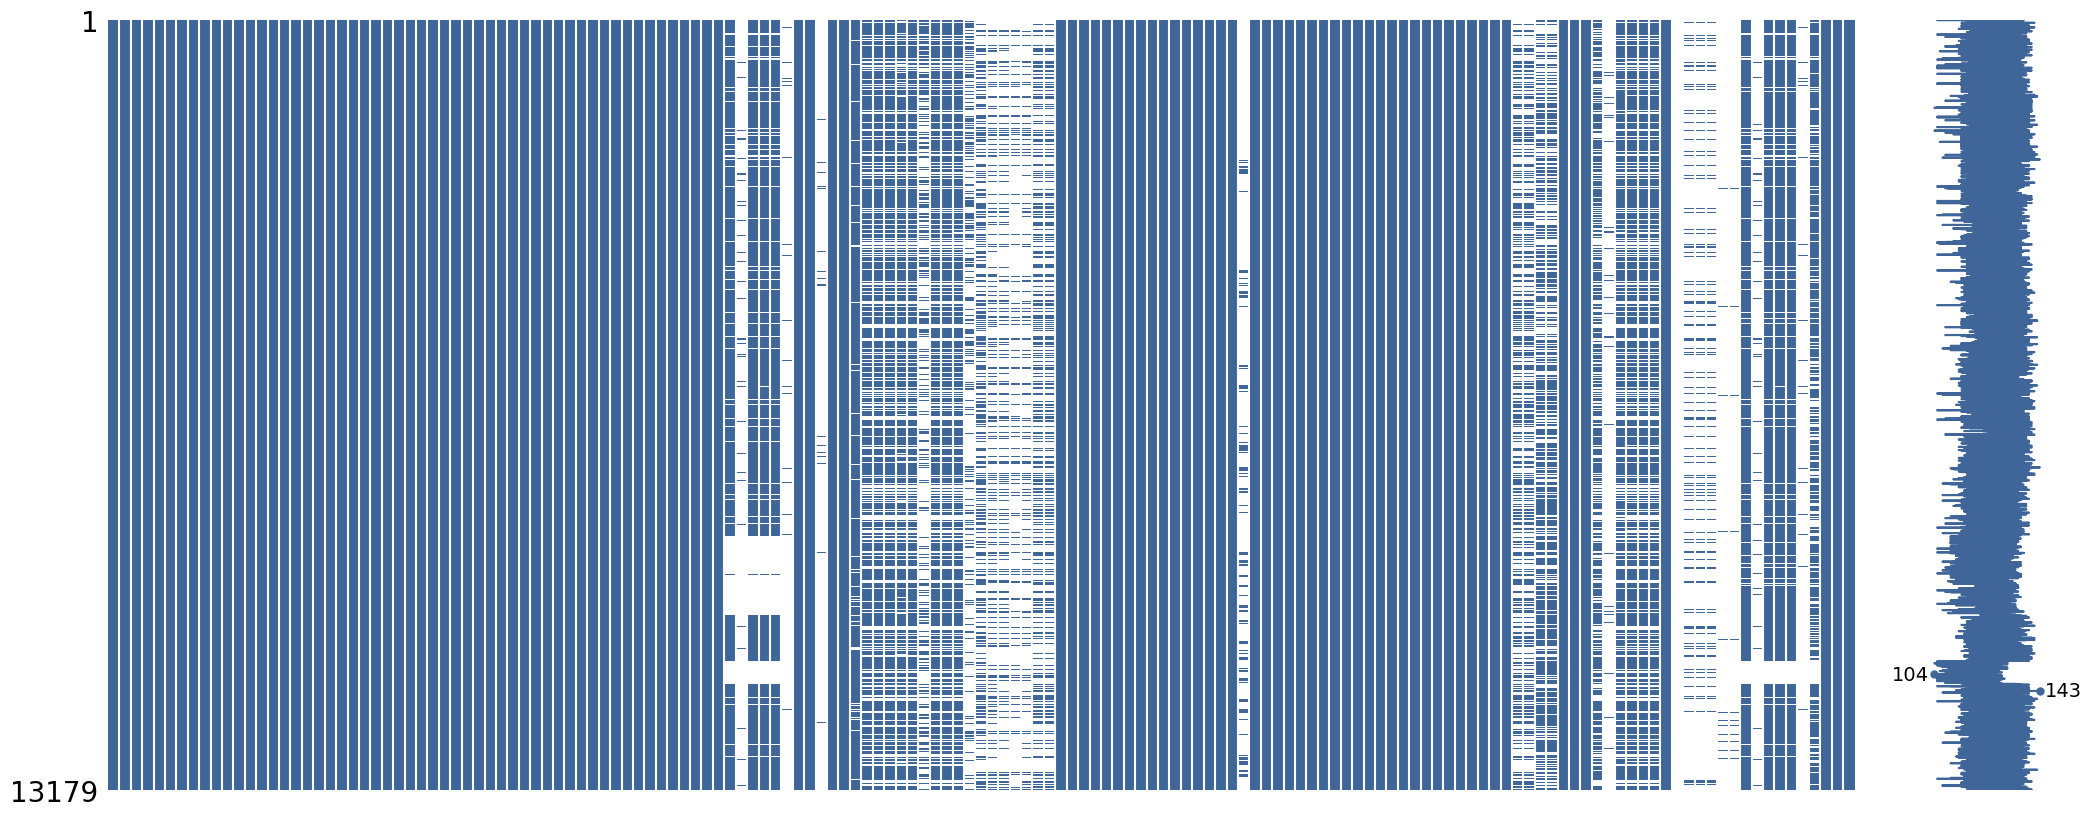

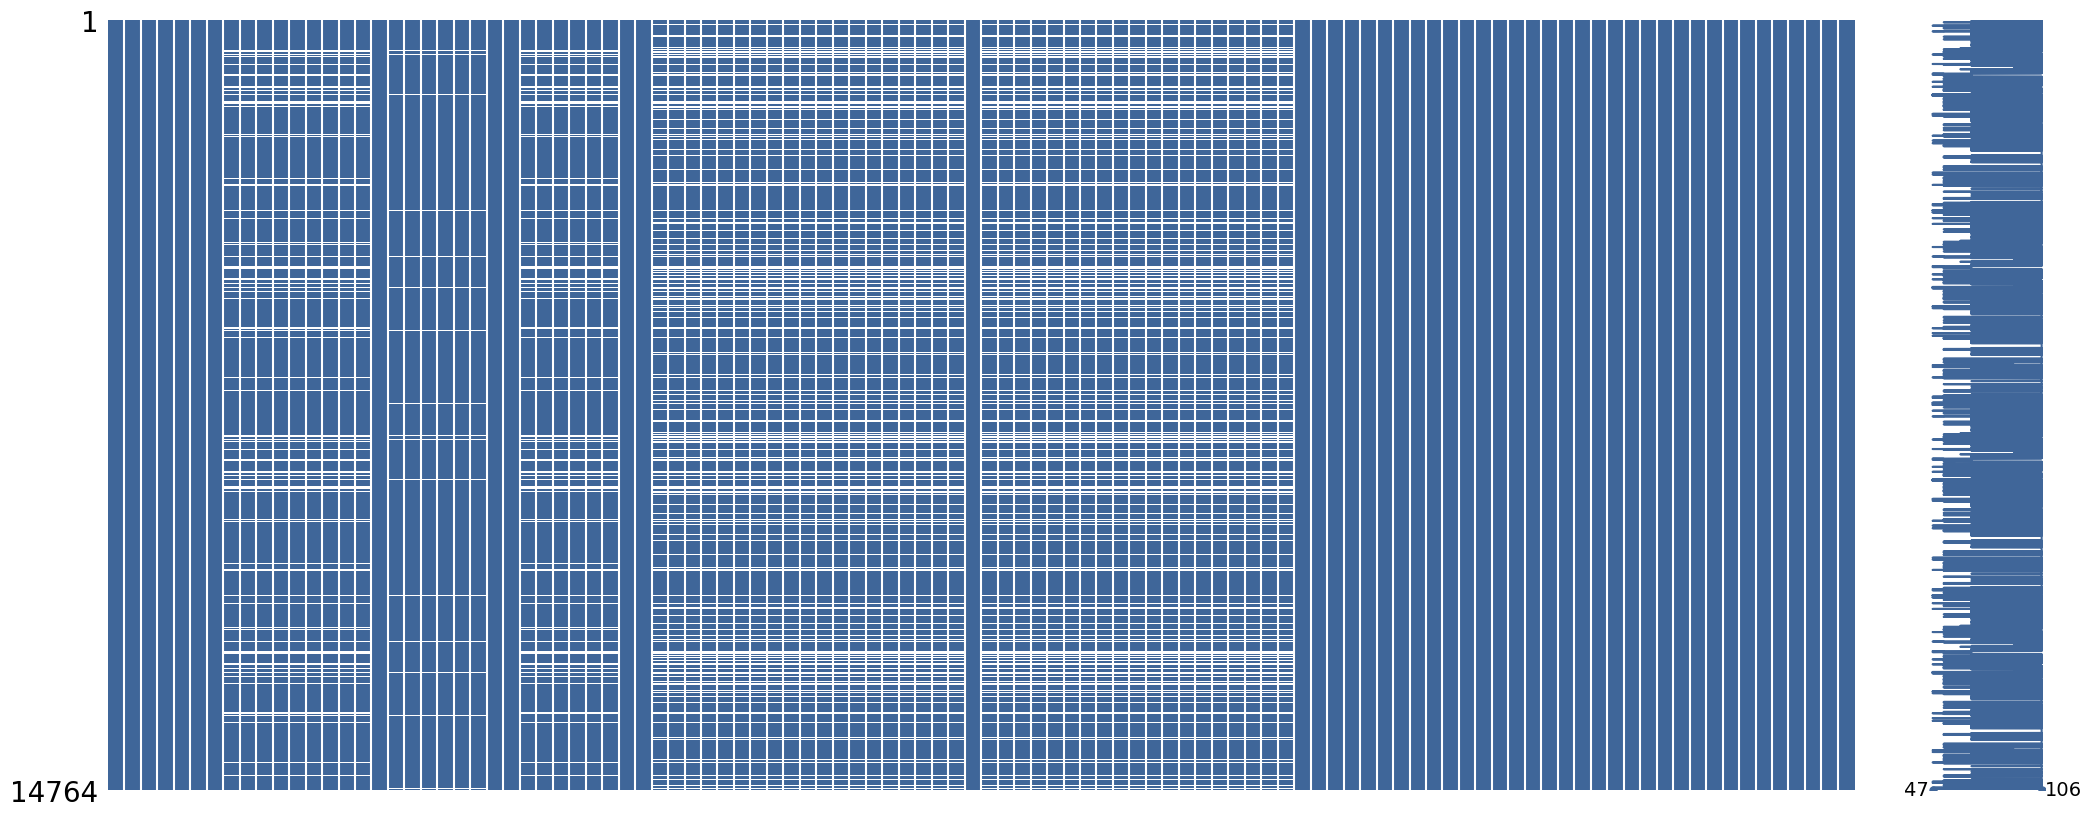

In [4]:
#화재 발생 데이터와 집계구 데이터를 확인 --> 단순 전처리에서 필요한 과정은 아님

msno.matrix(fire_with_code.iloc[:,:],color =(0.25,0.4,0.6))
msno.matrix(code_11.iloc[:,:],color =(0.25,0.4,0.6))

In [5]:
for i in range(10):
    #연도 별로 데이터 선택
    x = fire_with_code[fire_with_code['dclr_yr'] == (2011 + i)]
    #집계구 별 계절 별로 데이터 그룹화
    g = x.groupby(['TOT_REG_CD','qu_se']).size()
    c = g.to_frame()
    c = c.reset_index()
    c = c.rename(columns={'TOT_REG_CD':'code',0:'fire_count'})
    
    #집계구 데이터와 그룹화하여 화재발생 수를 계산한 데이터 병합
    code_list[i] = pd.merge(code_list[i],c,left_on=['code','season'],right_on=['code','qu_se'],how='left')

    

In [6]:
#화재 발생 건수가 추가된 집계구 데이터 저장하기

code_list[0].to_csv('./code_data/code_2011.csv',index=True,encoding='EUC-KR')

code_list[1].to_csv('./code_data/code_2012.csv',index=True,encoding='EUC-KR')

code_list[2].to_csv('./code_data/code_2013.csv',index=True,encoding='EUC-KR')

code_list[3].to_csv('./code_data/code_2014.csv',index=True,encoding='EUC-KR')

code_list[4].to_csv('./code_data/code_2015.csv',index=True,encoding='EUC-KR')

code_list[5].to_csv('./code_data/code_2016.csv',index=True,encoding='EUC-KR')

code_list[6].to_csv('./code_data/code_2017.csv',index=True,encoding='EUC-KR')

code_list[7].to_csv('./code_data/code_2018.csv',index=True,encoding='EUC-KR')

code_list[8].to_csv('./code_data/code_2019.csv',index=True,encoding='EUC-KR')

code_list[9].to_csv('./code_data/code_2020.csv',index=True,encoding='EUC-KR')

### 연도별 화재 분석을 위한 추가 코드

In [38]:
code_11 = pd.read_csv('./code_data/ycode_2011.csv',encoding='EUC-KR')
code_12 = pd.read_csv('./code_data/ycode_2012.csv',encoding='EUC-KR')
code_13 = pd.read_csv('./code_data/ycode_2013.csv',encoding='EUC-KR')
code_14 = pd.read_csv('./code_data/ycode_2014.csv',encoding='EUC-KR')
code_15 = pd.read_csv('./code_data/ycode_2015.csv',encoding='EUC-KR')
code_16 = pd.read_csv('./code_data/ycode_2016.csv',encoding='EUC-KR')
code_17 = pd.read_csv('./code_data/ycode_2017.csv',encoding='EUC-KR')
code_18 = pd.read_csv('./code_data/ycode_2018.csv',encoding='EUC-KR')
code_19 = pd.read_csv('./code_data/ycode_2019.csv',encoding='EUC-KR')
code_20 = pd.read_csv('./code_data/ycode_2020.csv',encoding='EUC-KR')

code_list = [code_11,code_12,code_13,code_14,code_15,code_16,code_17,code_18,code_19,code_20]

code_list[0]

,Unnamed: 0,code,total_pop,avg_age,pop_dens,eld_dep_ratio,total_house,ho_ar_001,ho_ar_002,ho_ar_003,...,cp_bem_014,cp_bem_015,cp_bem_016,cp_bem_017,cp_bem_018,cp_bem_019,cp_bem_999,do_index,si_index,dong_index
0,0,35011600010001,597,42.8,10347.1,143.0,169,0.0,0.0,5.0,...,0.0,0.0,0.0,6.0,0.0,5.0,0.0,35,11,600
1,1,35011600010002,884,42.9,3981.5,211.8,230,0.0,7.0,19.0,...,21.0,15.0,0.0,5.0,7.0,24.0,0.0,35,11,600
2,2,35011600010003,889,28.6,6742.7,276.5,82,0.0,0.0,8.0,...,0.0,0.0,114.0,9.0,0.0,13.0,0.0,35,11,600
3,3,35011600020001,556,43.6,721.5,132.1,174,0.0,6.0,32.0,...,0.0,36.0,0.0,0.0,0.0,5.0,0.0,35,11,600
4,4,35011600020002,550,45.7,136.9,208.8,217,0.0,6.0,85.0,...,0.0,0.0,0.0,12.0,0.0,9.0,0.0,35,11,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,3686,35580420010191,14,53.4,7.4,0.0,7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35,580,420
3687,3687,35580420010205,0,0.0,0.0,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,35,580,420
3688,3688,35580420010234,0,0.0,0.0,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,35,580,420
3689,3689,35580420010255,0,0.0,0.0,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,35,580,420


In [39]:
for i in range(10):
    #연도 별로 데이터 선택
    x = fire_with_code[fire_with_code['dclr_yr'] == (2011 + i)]
    #집계구 별 계절 별로 데이터 그룹화
    g = x.groupby(['TOT_REG_CD']).size()
    c = g.to_frame()
    c = c.reset_index()
    c = c.rename(columns={'TOT_REG_CD':'code',0:'fire_count'})
   
    #집계구 데이터와 그룹화하여 화재발생 수를 계산한 데이터 병합
    code_list[i] = code_list[i].drop('Unnamed: 0',axis=1)
    code_list[i] = pd.merge(code_list[i],c,left_on=['code'],right_on=['code'],how='left')

In [41]:
#화재 발생 건수가 추가된 집계구 데이터 저장하기

code_list[0].to_csv('./code_data/ycode_2011.csv',index=True,encoding='EUC-KR')

code_list[1].to_csv('./code_data/ycode_2012.csv',index=True,encoding='EUC-KR')

code_list[2].to_csv('./code_data/ycode_2013.csv',index=True,encoding='EUC-KR')

code_list[3].to_csv('./code_data/ycode_2014.csv',index=True,encoding='EUC-KR')

code_list[4].to_csv('./code_data/ycode_2015.csv',index=True,encoding='EUC-KR')

code_list[5].to_csv('./code_data/ycode_2016.csv',index=True,encoding='EUC-KR')

code_list[6].to_csv('./code_data/ycode_2017.csv',index=True,encoding='EUC-KR')

code_list[7].to_csv('./code_data/ycode_2018.csv',index=True,encoding='EUC-KR')

code_list[8].to_csv('./code_data/ycode_2019.csv',index=True,encoding='EUC-KR')

code_list[9].to_csv('./code_data/ycode_2020.csv',index=True,encoding='EUC-KR')